In [28]:
import cv2
import PIL
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

print('NumPy Version: ', np.__version__)
print('OpenCV Version: ', cv2.__version__)
print('PIL Version: ', PIL.__version__)


NumPy Version:  2.2.4
OpenCV Version:  4.11.0
PIL Version:  11.1.0


In [21]:
# URL del stream de la cámara en la red (ajusta IP y puerto según la configuración)
url = "http://192.168.0.17:8080/video"
cap = cv2.VideoCapture(url)

if not cap.isOpened():
    print("Error al acceder al stream de la cámara")
print("Acesso OK Camara")


Acesso OK Camara


In [22]:
num_images = 10
image_list = []

for i in range(num_images):
        ret, frame = cap.read()
        if not ret:
            print(f"Erro ao capturar a imagem {i+1}")
            continue

        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)  # Converter para tons de cinza
        image_list.append(gray_frame)

        print(f"Imagem {i+1} capturada")
        #cv2.imshow("Imagem Capturada", gray_frame)
        cv2.waitKey(1000)  # Esperar 1 segundo

cap.release()  # Liberar a webcam
cv2.destroyAllWindows()  # Fechar

if len(image_list) < 2:
    print("Não há imagens suficientes para calcular diferenças.")
else:
    print("Captura finalizada com sucesso!")

Imagem 1 capturada
Imagem 2 capturada
Imagem 3 capturada
Imagem 4 capturada
Imagem 5 capturada
Imagem 6 capturada
Imagem 7 capturada
Imagem 8 capturada
Imagem 9 capturada
Imagem 10 capturada
Captura finalizada com sucesso!


In [23]:
# Calcular a diferença acumulada entre imagens consecutivas
diff_accumulated = np.zeros_like(image_list[0], dtype=np.float32)

for i in range(1, len(image_list)):
    diff = cv2.absdiff(image_list[i], image_list[i - 1])
    diff_accumulated += diff

# Calcular a imagem média e o desvio padrão
image_mean = np.mean(image_list, axis=0)
image_std = np.std(image_list, axis=0)




## 📊 Análise

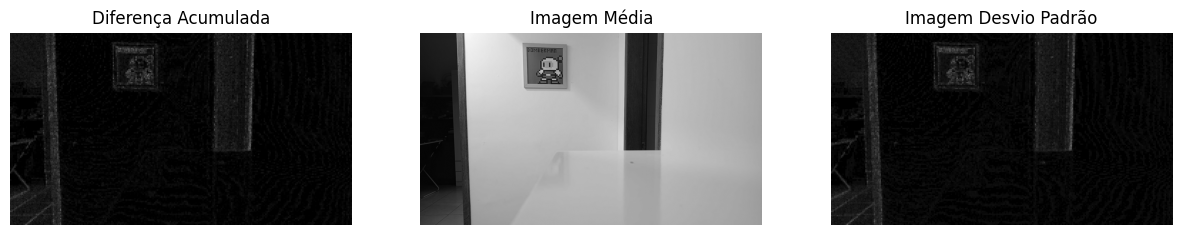

In [30]:
# Exibir um título geral
display(Markdown("## 📊 Análise"))

# Plotando as imagens lado a lado
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Lista de imagens e títulos
titles = ["Diferença Acumulada", "Imagem Média", "Imagem Desvio Padrão"]
data = [diff_accumulated, image_mean, image_std]

for i in range(3):
    axs[i].imshow(data[i], cmap='gray')
    axs[i].set_title(titles[i])
    axs[i].axis("off")  # Remove eixos

plt.show()  # Exibir as imagens

### 🔹 Diferencia Acumulada

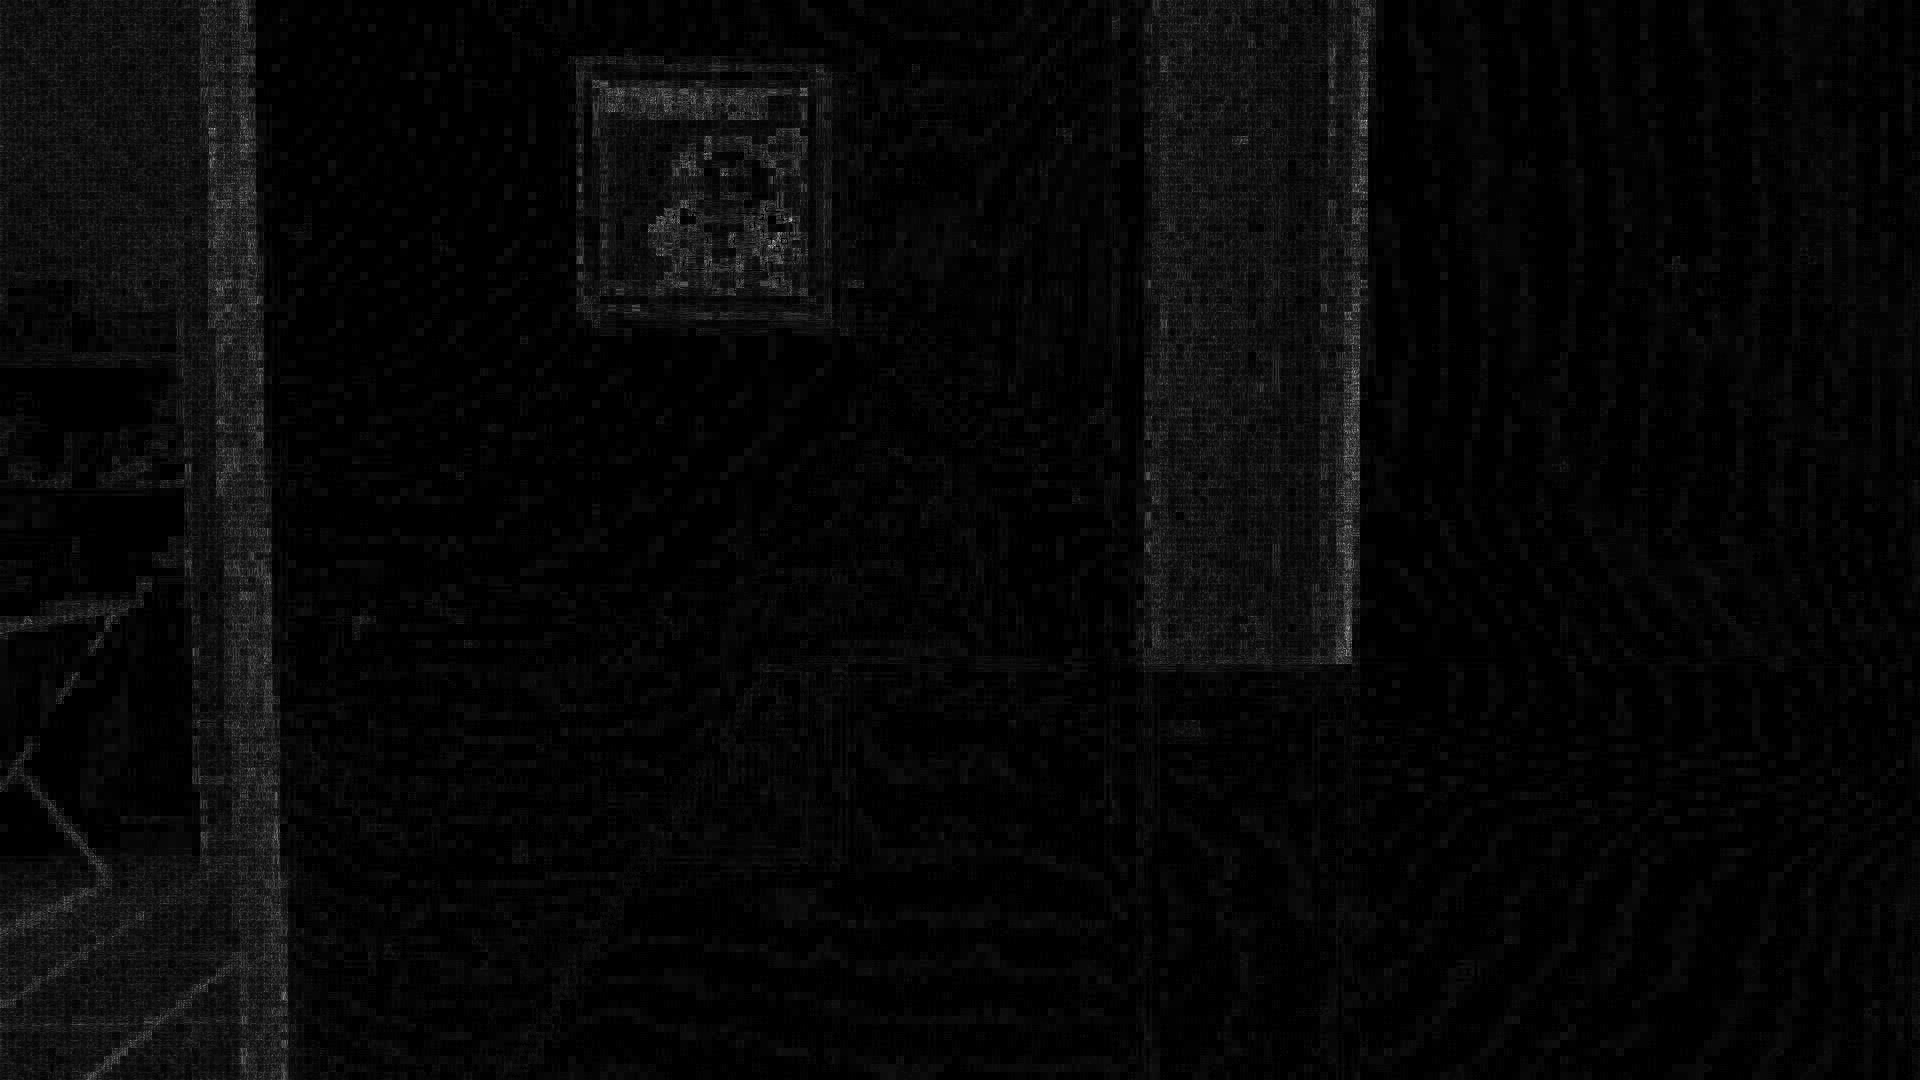

### 🔹 Imagen Media

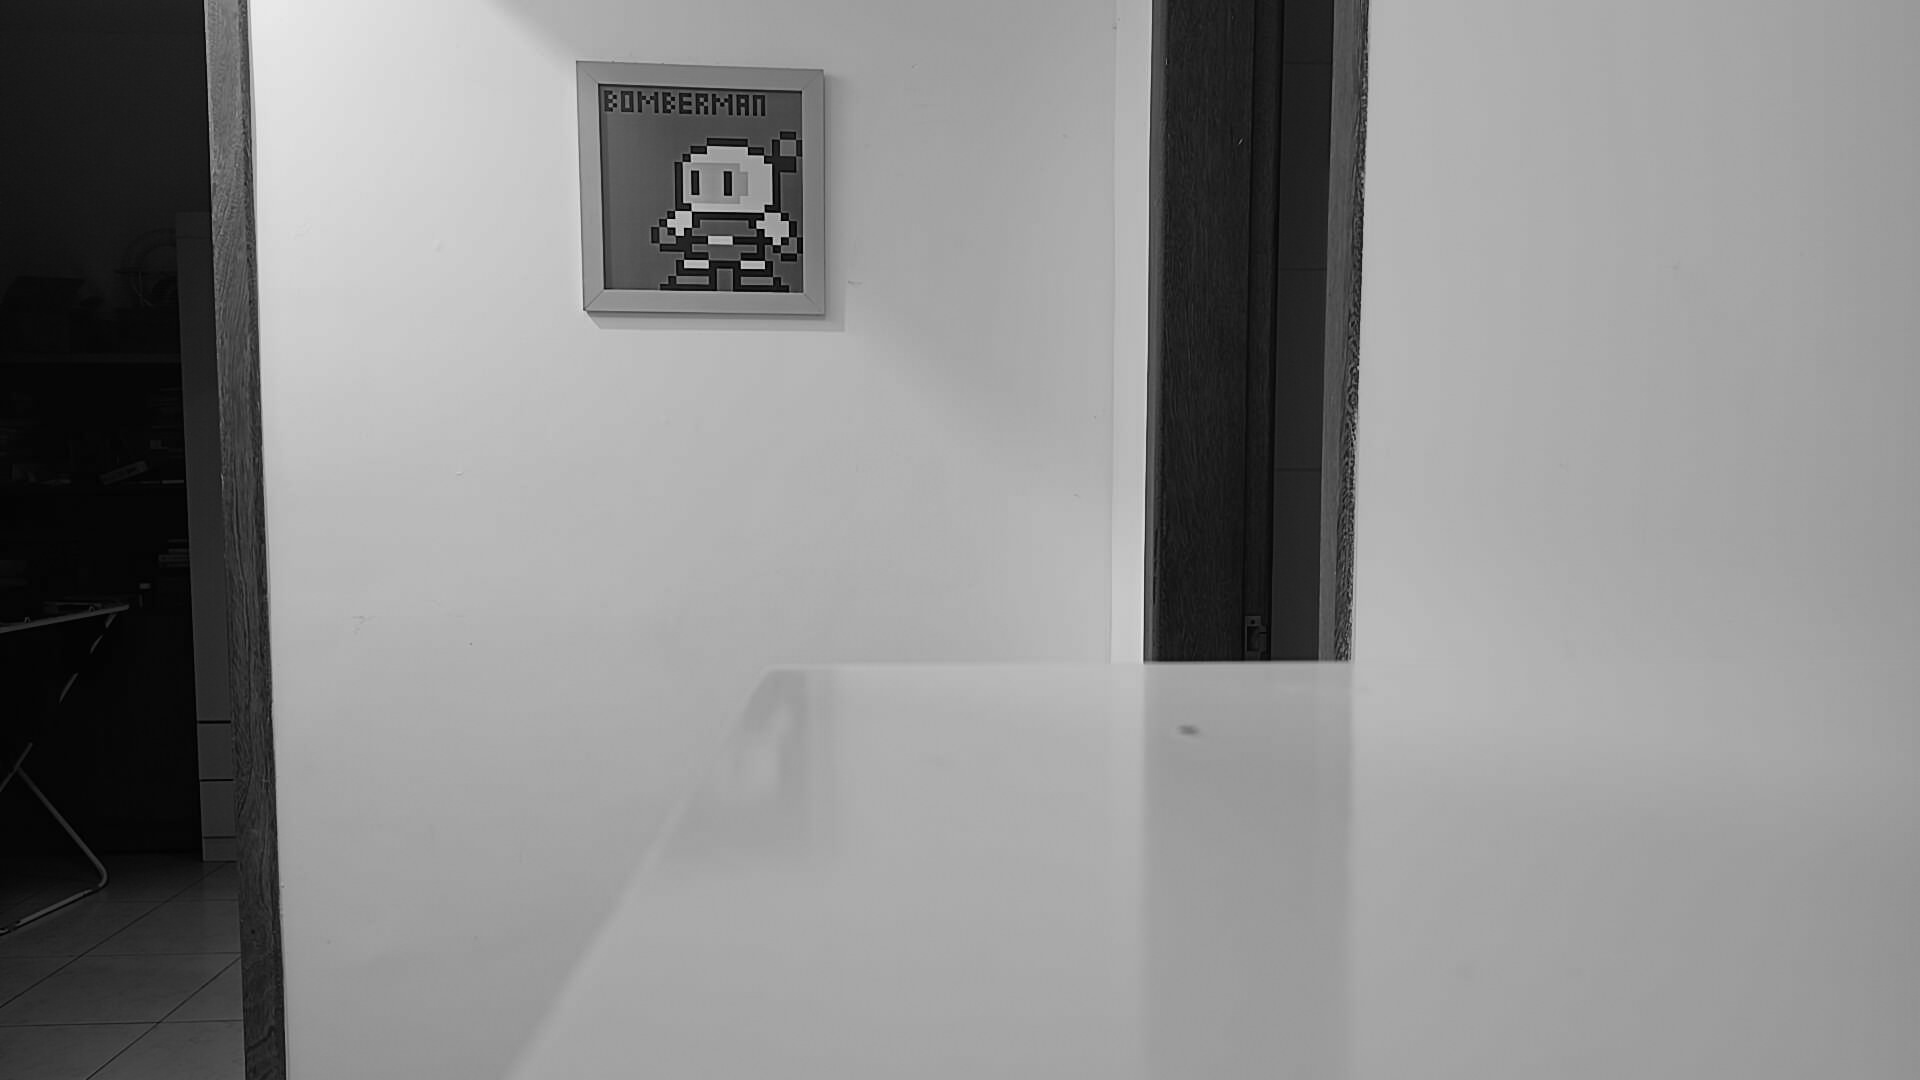

### 🔹 Imagen Desviación Estándar

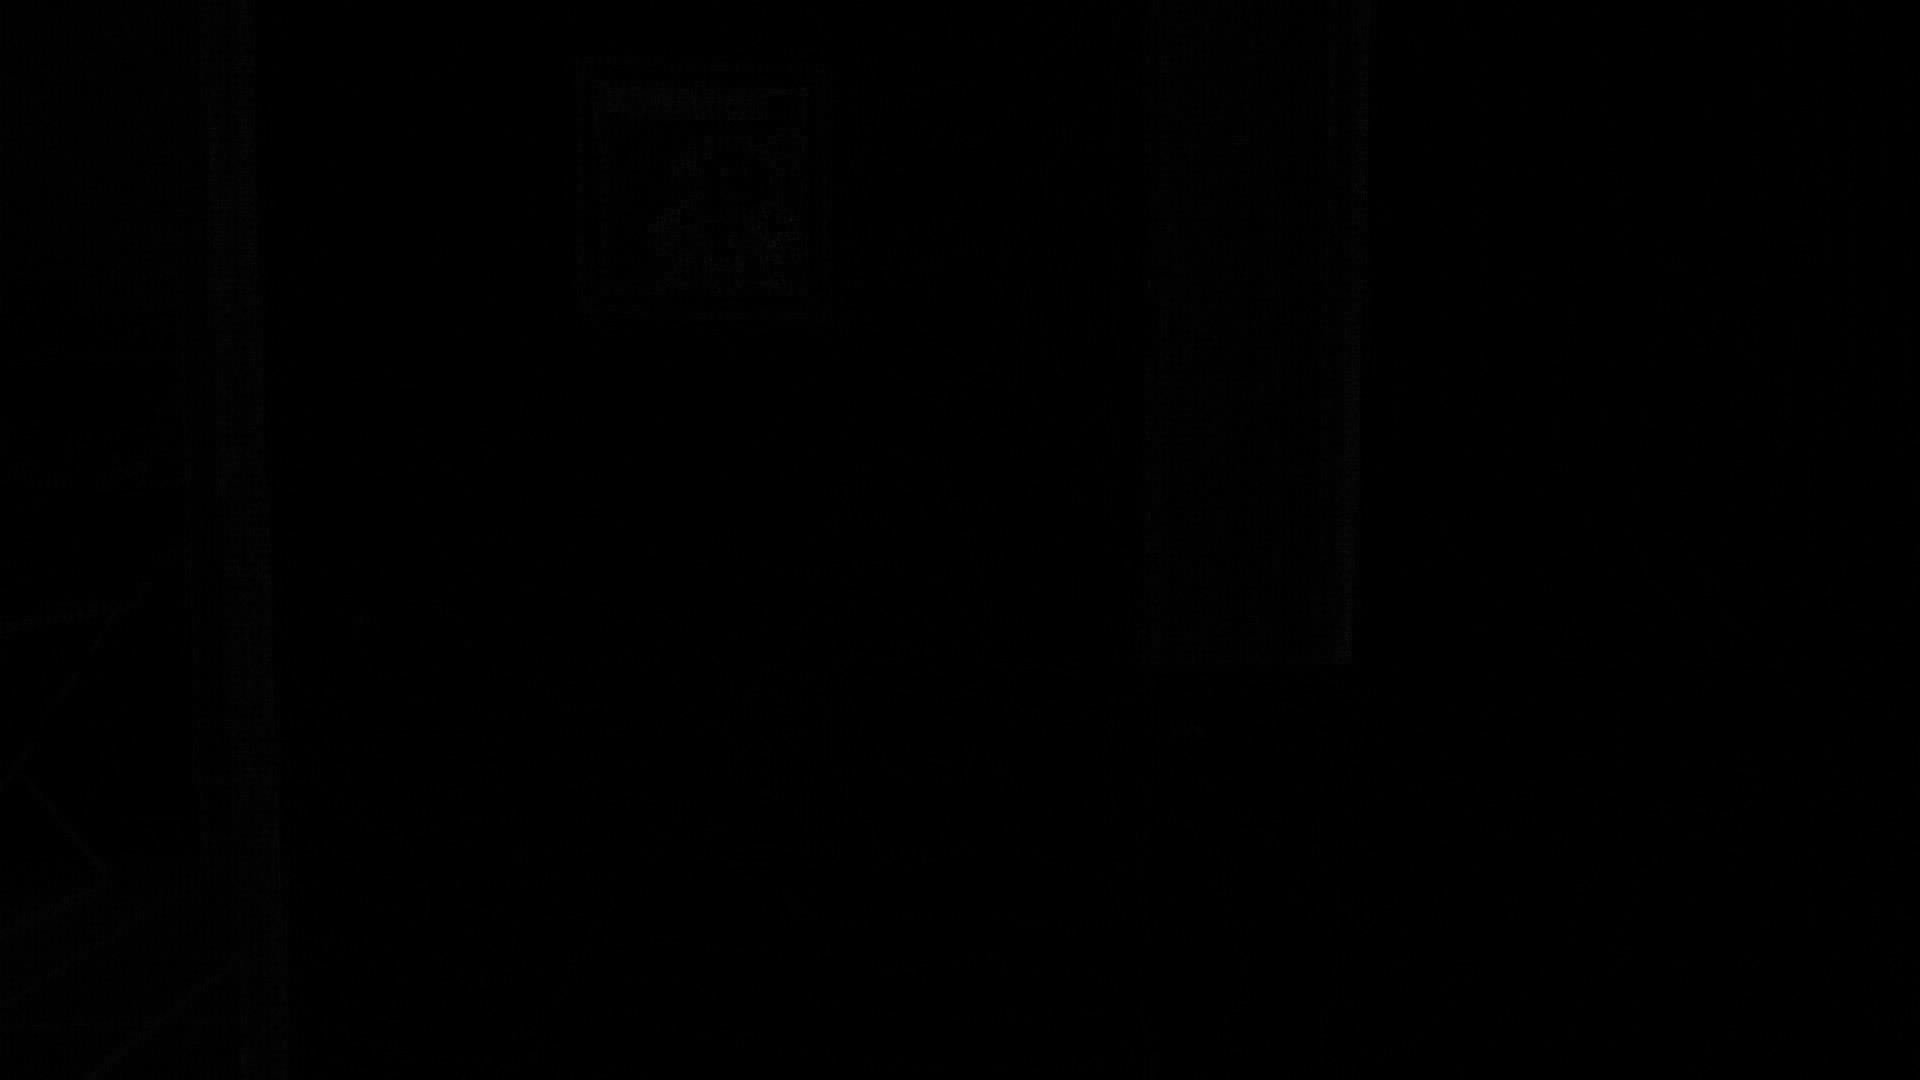

In [29]:
# 🔹 Convertir NumPy arrays a imágenes PIL
diff_accumulated_pil = Image.fromarray(diff_accumulated.astype(np.uint8))
image_mean_pil = Image.fromarray(image_mean.astype(np.uint8))
image_std_pil = Image.fromarray(image_std.astype(np.uint8))

# 🎨 Mostrar las imágenes en Jupyter usando PIL
display(Markdown("### 🔹 Diferencia Acumulada"))
display(diff_accumulated_pil)

display(Markdown("### 🔹 Imagen Media"))
display(image_mean_pil)

display(Markdown("### 🔹 Imagen Desviación Estándar"))
display(image_std_pil)